# Multi-class Classification

## 1. Import and become one with the data

In [1]:
import zipfile

from bleach.callbacks import target_blank

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2023-11-30 23:11:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.221.155, 142.251.221.123, 142.251.223.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.221.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  3.16MB/s    in 2m 49s  

2023-11-30 23:14:39 (2.92 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [5]:
import os 

for dirpath, dirnames, filenames in os.walk("/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data'.
there are 10 directories and 0 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train'.
there are 0 directories and 750 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/grilled_salmon'.
there are 0 directories and 750 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/sushi'.
there are 0 directories and 750 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/hamburger'.
there are 0 directories and 750 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/steak'.
there are 0 directories and 750 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/fried_rice'.
there are 0 directories and 750 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/chicken_curry'.
there are 0 directories and 750 ima

In [6]:
train_dir = "/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/"
test_dir = "/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/test/"

In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [8]:
# Function to visualize images in a grid format
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder),1)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}") # show the shape of the image
    
    return img

Image shape: (512, 512, 3)


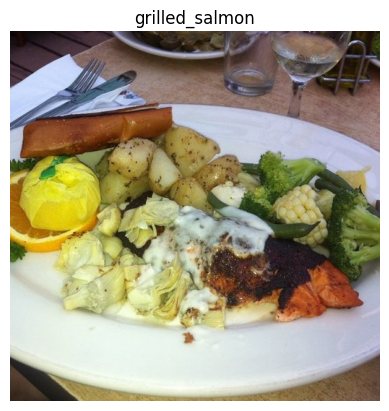

In [9]:
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for a model)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale the data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir, # target directory
    target_size=(224,224), # target image size
    batch_size=32, # batch size (32 is default)
    class_mode="categorical", # type of problem we're working on
)

# Create test data generator and load in test data
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)

In [11]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create a CNN model (same as Tiny VGG)
model = Sequential(
    [
        Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
        Conv2D(10,3,activation="relu"),
        MaxPool2D(pool_size=2),
        Conv2D(10,3,activation="relu"),
        Conv2D(10,3,activation="relu"),
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(10,activation="softmax")
    ]     
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir="/home/gabe/Documents/TF_Learn_DL/tensorboard_logs/tb_callback_dir",
    histogram_freq=1
)


2023-12-03 07:21:29.169406: I tensorflow/stream_executor/rocm/rocm_gpu_executor.cc:832] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-03 07:21:30.285948: I tensorflow/stream_executor/rocm/rocm_gpu_executor.cc:832] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-03 07:21:30.286033: I tensorflow/stream_executor/rocm/rocm_gpu_executor.cc:832] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-03 07:21:30.287701: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the app

## 4. Fit a model

In [12]:
summary = model.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=[tensorboard_callback]
)

Epoch 1/5


2023-12-03 07:21:34.187667: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:21:34.212579: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:21:35.012914: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:21:35.020261: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:21:35.022613: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:21:35.024472: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.2757 - accuracy: 0.1691

2023-12-03 07:22:31.564431: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:22:31.573754: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:22:31.670352: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:22:31.674140: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:22:31.676054: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:22:31.677417: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 62s 260ms/step - loss: 2.2757 - accuracy: 0.1691 - val_loss: 2.0908 - val_accuracy: 0.2320
Epoch 2/5


2023-12-03 07:22:36.595993: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:22:36.602465: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:22:36.604603: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:22:36.606265: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 1.9833 - accuracy: 0.3071

2023-12-03 07:23:31.979187: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:23:31.987910: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:23:31.992944: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:23:31.995098: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:23:31.996942: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 60s 254ms/step - loss: 1.9833 - accuracy: 0.3071 - val_loss: 1.9909 - val_accuracy: 0.2972
Epoch 3/5


2023-12-03 07:23:36.422725: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:23:36.429377: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:23:36.431494: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:23:36.433076: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 1.7741 - accuracy: 0.3903

2023-12-03 07:24:31.837978: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:24:31.848502: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:24:31.854446: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:24:31.857749: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:24:31.860196: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 60s 254ms/step - loss: 1.7741 - accuracy: 0.3903 - val_loss: 2.0297 - val_accuracy: 0.3112
Epoch 4/5


2023-12-03 07:24:36.312004: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:24:36.320260: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:24:36.322322: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:24:36.324039: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 1.4365 - accuracy: 0.5107

2023-12-03 07:25:31.717754: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:25:31.726605: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:25:31.730819: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:25:31.732870: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:25:31.734403: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 60s 254ms/step - loss: 1.4365 - accuracy: 0.5107 - val_loss: 2.3124 - val_accuracy: 0.2712
Epoch 5/5


2023-12-03 07:25:36.189718: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:25:36.196768: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:25:36.198842: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:25:36.200309: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.9337 - accuracy: 0.6911

2023-12-03 07:26:31.535914: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:26:31.544623: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:26:31.549068: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:26:31.551174: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 07:26:31.552752: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 60s 254ms/step - loss: 0.9337 - accuracy: 0.6911 - val_loss: 2.6115 - val_accuracy: 0.2676


## 5. Evaluate the model

In [9]:
model.evaluate(test_data)

 2/79 [..............................] - ETA: 4s - loss: 3.2995 - accuracy: 0.2188 

2023-12-02 21:42:48.115154: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:42:48.124162: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:42:48.128428: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:42:48.130338: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:42:48.131838: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


79/79 [==============================] - 5s 57ms/step - loss: 3.6883 - accuracy: 0.2576


[3.6882917881011963, 0.25760000944137573]

In [10]:
# Plot the validation and training data separately
def  plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    :param history: 
    :return: Graph
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    # Plot loss
    plt.plot(epochs, loss, label='Training_loss')
    plt.plot(epochs, val_loss, label='Label_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="Training_accuracy")
    plt.plot(epochs, val_accuracy, label="Val_accuracy")
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

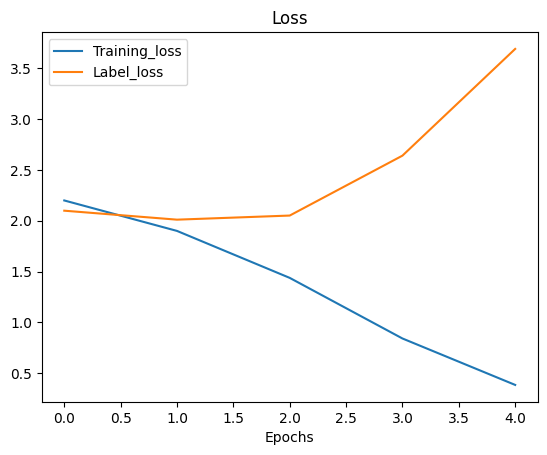

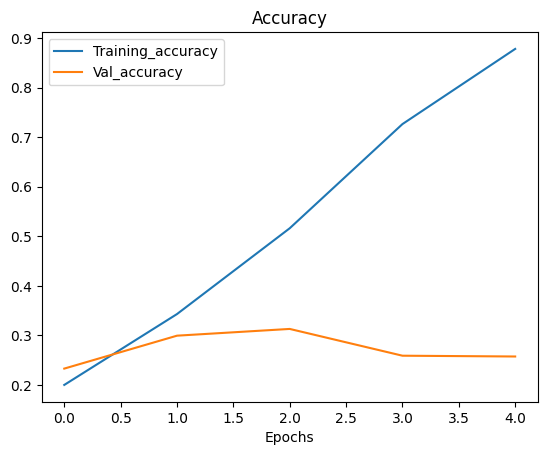

In [11]:
plot_loss_curves(summary)

## 6. Adjust the model parameters

 ##### > Get more data
 ##### > Simplify model
 ##### > Use data augmentation
 ##### > Use transfer learning 

In [12]:
# Try a simplified model (remove two layers)
model = Sequential(
    [
        Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
        MaxPool2D(),
        Conv2D(10,3,activation="relu"),
        MaxPool2D(),
        Flatten(),
        Dense(10,activation="softmax")
    ]
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

summary = model.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5


2023-12-02 21:42:53.204890: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:42:53.213707: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


  1/235 [..............................] - ETA: 1:38 - loss: 2.3350 - accuracy: 0.0625

2023-12-02 21:42:53.472447: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:42:53.477280: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:42:53.479257: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:42:53.480655: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.2632 - accuracy: 0.1857

2023-12-02 21:43:16.908109: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:43:16.916555: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:43:16.987829: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:43:16.991224: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:43:16.993102: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:43:16.994397: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 27s 115ms/step - loss: 2.2632 - accuracy: 0.1857 - val_loss: 2.0505 - val_accuracy: 0.2592
Epoch 2/5
  1/235 [..............................] - ETA: 37s - loss: 1.9803 - accuracy: 0.3750

2023-12-02 21:43:20.552819: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:43:20.559706: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:43:20.561829: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:43:20.563543: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 1.8739 - accuracy: 0.3551

2023-12-02 21:43:44.004004: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:43:44.012650: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:43:44.016999: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:43:44.018983: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:43:44.020381: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 27s 114ms/step - loss: 1.8739 - accuracy: 0.3551 - val_loss: 1.9382 - val_accuracy: 0.3200
Epoch 3/5
  1/235 [..............................] - ETA: 39s - loss: 1.6366 - accuracy: 0.5000

2023-12-02 21:43:47.430467: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:43:47.436856: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:43:47.439016: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:43:47.440676: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 1.4314 - accuracy: 0.5328

2023-12-02 21:44:10.724191: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:44:10.732769: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:44:10.737586: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:44:10.739571: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:44:10.741123: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 27s 114ms/step - loss: 1.4314 - accuracy: 0.5328 - val_loss: 2.0592 - val_accuracy: 0.3212
Epoch 4/5
  1/235 [..............................] - ETA: 38s - loss: 0.8065 - accuracy: 0.7812

2023-12-02 21:44:14.170663: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:44:14.176937: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:44:14.178996: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:44:14.180635: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.8554 - accuracy: 0.7344

2023-12-02 21:44:37.445032: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:44:37.453614: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:44:37.457860: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:44:37.460004: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:44:37.461403: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 27s 113ms/step - loss: 0.8554 - accuracy: 0.7344 - val_loss: 2.4542 - val_accuracy: 0.2912
Epoch 5/5
  1/235 [..............................] - ETA: 39s - loss: 0.2917 - accuracy: 1.0000

2023-12-02 21:44:40.833827: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:44:40.840063: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:44:40.842123: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:44:40.843540: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.3976 - accuracy: 0.8897

2023-12-02 21:45:04.095924: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:45:04.104704: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:45:04.109476: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:45:04.112358: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:45:04.114369: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 27s 114ms/step - loss: 0.3976 - accuracy: 0.8897 - val_loss: 3.1159 - val_accuracy: 0.2664


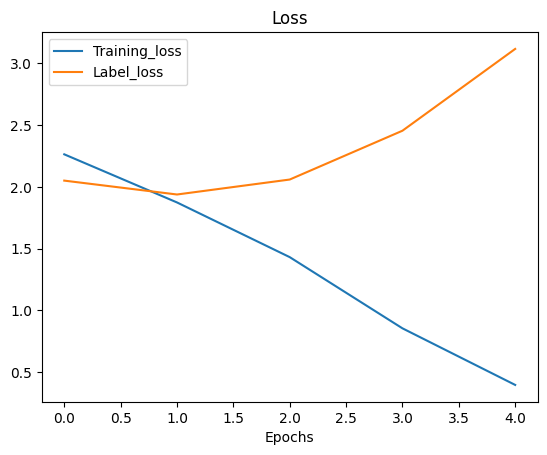

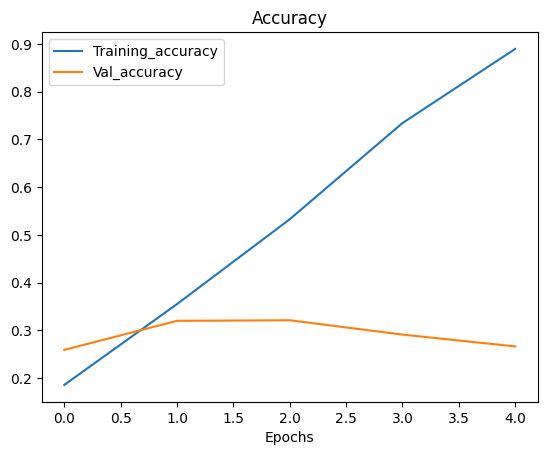

In [13]:
plot_loss_curves(summary)

In [14]:
# Still Overfitting with simplify model
# Try use augmentation

train_augment_generator = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data_augment = train_augment_generator.flow_from_directory(
    train_dir, target_size=(224,224), batch_size=32, class_mode="categorical"
)

Found 7500 images belonging to 10 classes.


In [15]:
# Clone prev model
model_newest = tf.keras.models.clone_model(model)

# Compile the cloned model
model_newest.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

summary_new = model_newest.fit(
    train_data_augment,
    epochs=5,
    steps_per_epoch=len(train_data_augment),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5


2023-12-02 21:45:08.414650: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:45:08.422806: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:45:08.665607: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:45:08.670522: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:45:08.672541: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:45:08.674020: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.1491 - accuracy: 0.2231

2023-12-02 21:46:07.371623: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:46:07.379961: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:46:07.447919: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:46:07.451286: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:46:07.453114: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:46:07.454391: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 62s 264ms/step - loss: 2.1491 - accuracy: 0.2231 - val_loss: 1.9508 - val_accuracy: 0.3048
Epoch 2/5


2023-12-02 21:46:10.879045: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:46:10.886289: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:46:10.888154: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:46:10.889462: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.0348 - accuracy: 0.2832

2023-12-02 21:47:09.599137: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:47:09.607465: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:47:09.611549: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:47:09.613626: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:47:09.615058: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 62s 264ms/step - loss: 2.0348 - accuracy: 0.2832 - val_loss: 1.9261 - val_accuracy: 0.3248
Epoch 3/5


2023-12-02 21:47:13.018294: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:47:13.024836: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:47:13.026695: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:47:13.028008: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.0137 - accuracy: 0.2923

2023-12-02 21:48:12.018744: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:48:12.026906: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:48:12.031101: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:48:12.033190: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:48:12.034735: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 62s 265ms/step - loss: 2.0137 - accuracy: 0.2923 - val_loss: 1.8849 - val_accuracy: 0.3432
Epoch 4/5


2023-12-02 21:48:15.437990: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:48:15.444223: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:48:15.446285: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:48:15.447949: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 1.9839 - accuracy: 0.3071

2023-12-02 21:49:14.222124: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:49:14.230417: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:49:14.234847: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:49:14.237744: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:49:14.239795: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 62s 264ms/step - loss: 1.9839 - accuracy: 0.3071 - val_loss: 1.9816 - val_accuracy: 0.3224
Epoch 5/5


2023-12-02 21:49:17.608444: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:49:17.614715: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:49:17.616851: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:49:17.618509: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 1.9567 - accuracy: 0.3184

2023-12-02 21:50:15.908733: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:50:15.917041: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:50:15.921804: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:50:15.924746: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:50:15.926744: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 62s 263ms/step - loss: 1.9567 - accuracy: 0.3184 - val_loss: 1.7908 - val_accuracy: 0.3880


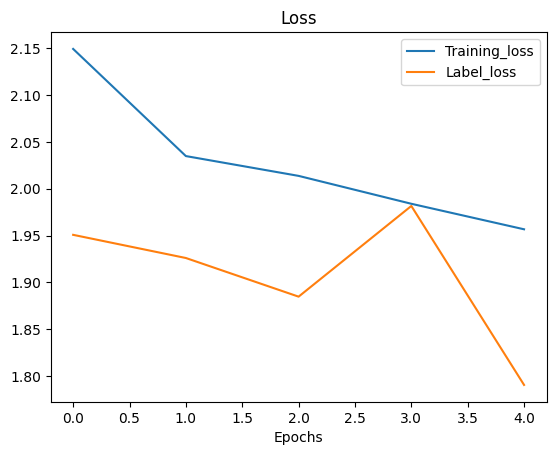

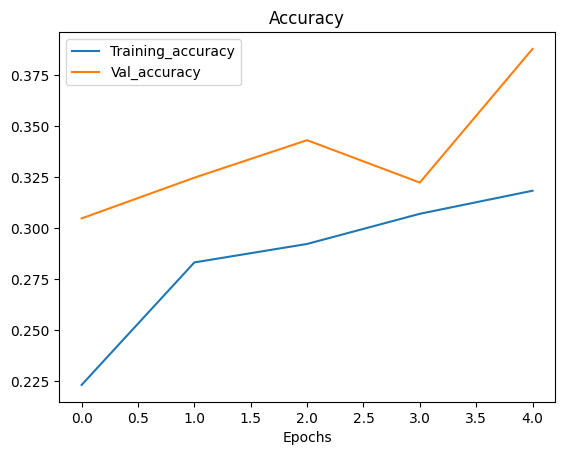

In [16]:
plot_loss_curves(summary_new)

## 7. Repeat until satisified

##### > Increase the number of model layers (e.g. add more convolutional layers).
##### > Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
##### > Train for longer (more epochs).
##### > Finding an ideal learning rate.
##### > Get more data (give the model more opportunities to learn).
##### > Use transfer learning.

In [17]:
model_v2 = Sequential(
    [
        Conv2D(64, 3, activation="relu", input_shape=(224,224,3)),
        Conv2D(64, 3, activation="relu"),
        MaxPool2D(pool_size=2),
        Conv2D(64, 3, activation="relu"),
        Conv2D(64, 3, activation="relu"),
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(10, activation="softmax")
    ]
)

model_v2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

summary_2 = model_v2.fit(
    train_data_augment,
    epochs=5,
    steps_per_epoch=len(train_data_augment),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5


2023-12-02 21:50:20.256469: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:50:20.265294: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:50:20.560990: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:50:20.566613: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:50:20.568565: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:50:20.570016: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.2802 - accuracy: 0.1341

2023-12-02 21:52:39.237129: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:52:39.245694: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:52:39.322558: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:52:39.326207: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:52:39.328080: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:52:39.329391: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 151s 640ms/step - loss: 2.2802 - accuracy: 0.1341 - val_loss: 2.2089 - val_accuracy: 0.2004
Epoch 2/5


2023-12-02 21:52:51.160753: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:52:51.166503: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:52:51.168402: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:52:51.169955: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.1919 - accuracy: 0.1999

2023-12-02 21:55:13.080073: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:55:13.089024: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:55:13.094159: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:55:13.096132: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:55:13.098493: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 154s 653ms/step - loss: 2.1919 - accuracy: 0.1999 - val_loss: 2.0785 - val_accuracy: 0.2456
Epoch 3/5


2023-12-02 21:55:24.933151: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:55:24.938464: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:55:24.940608: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:55:24.942384: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.1557 - accuracy: 0.2185

2023-12-02 21:57:44.711259: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:57:44.720672: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:57:44.725249: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:57:44.727296: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:57:44.728813: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 152s 645ms/step - loss: 2.1557 - accuracy: 0.2185 - val_loss: 2.0592 - val_accuracy: 0.2456
Epoch 4/5


2023-12-02 21:57:56.759512: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:57:56.766847: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:57:56.768893: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 21:57:56.770546: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.1118 - accuracy: 0.2388

2023-12-02 22:00:18.920268: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 22:00:18.928965: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 22:00:18.933393: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 22:00:18.935349: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 22:00:18.936744: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 154s 655ms/step - loss: 2.1118 - accuracy: 0.2388 - val_loss: 2.0677 - val_accuracy: 0.2564
Epoch 5/5


2023-12-02 22:00:30.956237: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 22:00:30.962619: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 22:00:30.964831: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 22:00:30.966615: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.0648 - accuracy: 0.2671

2023-12-02 22:02:50.803292: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 22:02:50.817101: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 22:02:50.821857: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 22:02:50.824288: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-02 22:02:50.825802: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 152s 645ms/step - loss: 2.0648 - accuracy: 0.2671 - val_loss: 1.9808 - val_accuracy: 0.3088


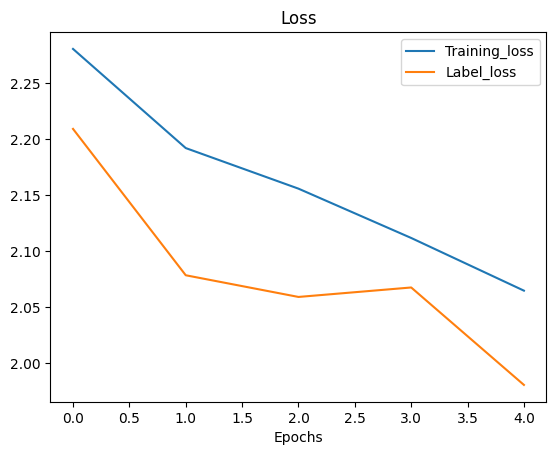

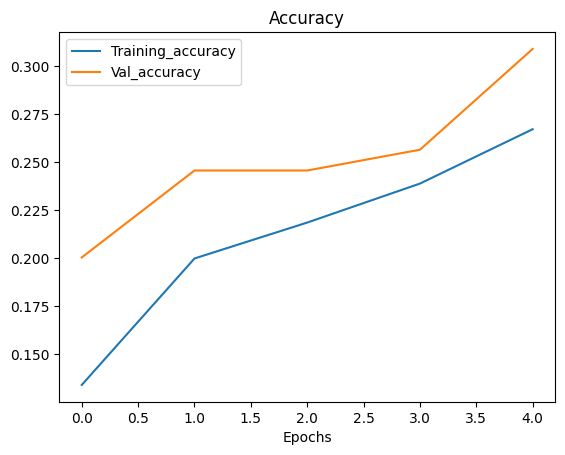

In [18]:
plot_loss_curves(summary_2)

In [19]:
summary_2.history

{'loss': [2.2801899909973145,
  2.1918540000915527,
  2.155693769454956,
  2.111758232116699,
  2.064823627471924],
 'accuracy': [0.13413333892822266,
  0.1998666673898697,
  0.21853333711624146,
  0.23880000412464142,
  0.2670666575431824],
 'val_loss': [2.208932638168335,
  2.078542470932007,
  2.0592215061187744,
  2.067652940750122,
  1.9808404445648193],
 'val_accuracy': [0.2003999948501587,
  0.24560000002384186,
  0.24560000002384186,
  0.2563999891281128,
  0.30880001187324524]}